# Experiments on Random Osborne Algorithm for Matrix Balancing

In [3]:
import osborn
import time
import scipy
import numpy as np
import matplotlib.pyplot as plt
import utils
from tqdm import tqdm
import networkx as nx

In [4]:
epsilon=1e-2

for method in ['greedy', 'cyclic', 'random', 'random_cyclic']:
    x = []
    times = []
    x_mean = []
    times_mean = []
    times_std = []
    m = 175
    kappa = 300
    for n in tqdm(range(20, 60), desc=method):
        for _ in range(10):
            #matrix = utils.generate_matrix_params(n=n, m=m, kappa=kappa)
            matrix = utils.generate_sparse_matrix(n=n, m=m)
            kappa = matrix.sum()/np.min(matrix.data)
            d = utils.diameter_of_matrix(matrix)

            balancer = osborn.MatrixBalancer(matrix, device='cpu', epsilon=epsilon)
            start_time = time.time()
            balanced_matrix, it = balancer.balance(method=method)
            #times.append((time.time() - start_time))
            times.append((time.time() - start_time) / (m * min(d, 1/epsilon) * np.log(kappa) /epsilon))
            #times.append((m * min(d, 1/epsilon) * np.log(kappa) /epsilon))
            # / (m * min(d, 1/epsilon) * np.log(kappa) /epsilon)
            x.append(n)
        x_mean.append(n)
        times_mean.append(np.mean(times[-10:]))
        times_std.append(np.std(times[-10:]))

    plt.errorbar(x_mean, times_mean, yerr=times_std, fmt="none", capsize=5., label="Standard deviation", color="cyan", zorder=1)
    plt.scatter(x_mean, times_mean, label="Mean value", color="magenta")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{method}_function_of_n_n_20_60__kappa_{kappa}.pdf")
    plt.show()

greedy:   5%|▌         | 2/40 [00:02<00:41,  1.09s/it]


KeyboardInterrupt: 

greedy: 100%|██████████| 240/240 [02:11<00:00,  1.83it/s]


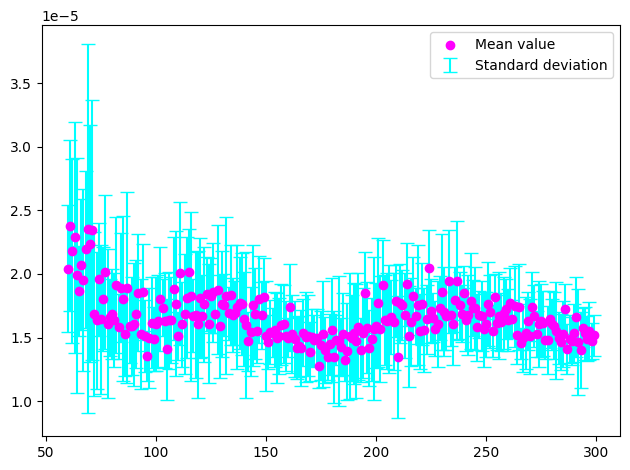

cyclic: 100%|██████████| 240/240 [03:01<00:00,  1.32it/s]


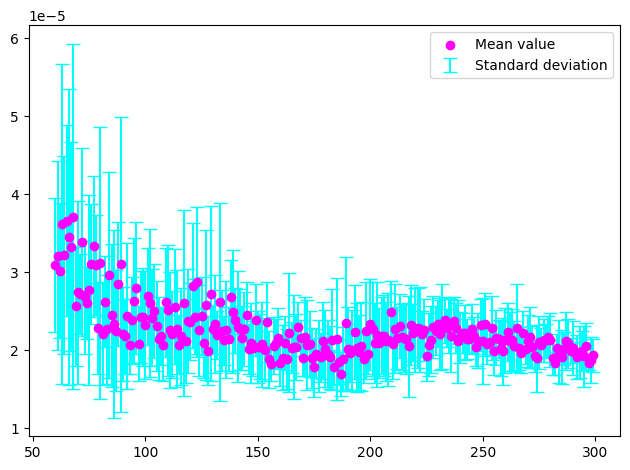

random: 100%|██████████| 240/240 [06:14<00:00,  1.56s/it]


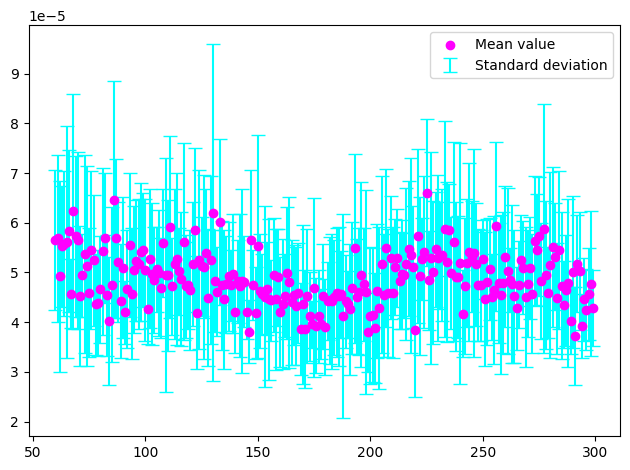

random_cyclic: 100%|██████████| 240/240 [03:14<00:00,  1.23it/s]


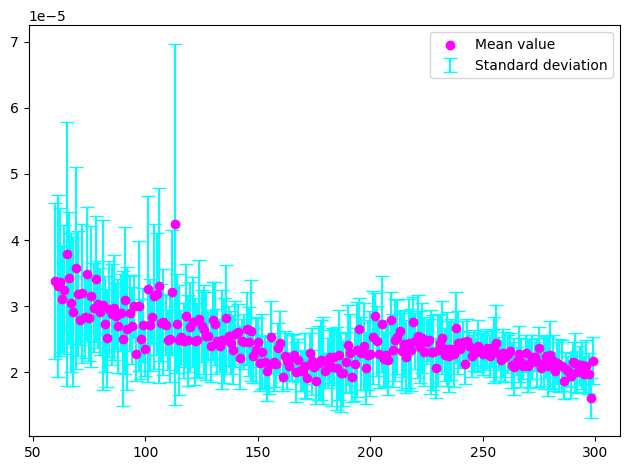

In [ ]:
epsilon=1e-2

for method in ['greedy', 'cyclic', 'random', 'random_cyclic']:
    x = []
    times = []
    x_mean = []
    times_mean = []
    times_std = []
    #kappa = 300
    n = 20
    for m in tqdm(range(60, 300), desc=method):
        for _ in range(10):
            matrix = utils.generate_sparse_matrix(n=n, m=m)
            kappa = matrix.sum()/np.min(matrix.data)
            d = utils.diameter_of_matrix(matrix)

            balancer = osborn.MatrixBalancer(matrix, device='cpu', epsilon=epsilon)
            start_time = time.time()
            balanced_matrix, it = balancer.balance(method=method)
            #times.append((time.time() - start_time))
            times.append((time.time() - start_time) / (min(d, 1/epsilon) * np.log(kappa) /epsilon))
            #times.append((m * min(d, 1/epsilon) * np.log(kappa) /epsilon))
            # / (m * min(d, 1/epsilon) * np.log(kappa) /epsilon)
            x.append(m)
        x_mean.append(m)
        times_mean.append(np.mean(times[-10:]))
        times_std.append(np.std(times[-10:]))
        #print(times_mean[-1])

    plt.errorbar(x_mean, times_mean, yerr=times_std, fmt="none", capsize=5., label="Standard deviation", color="cyan", zorder=1)
    plt.scatter(x_mean, times_mean, label="Mean value", color="magenta")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{method}_function_of_m_n_10_m_20_90_kappa_{kappa}.pdf")
    plt.show()

Kappa: 100%|██████████| 240/240 [00:04<00:00, 58.65it/s]


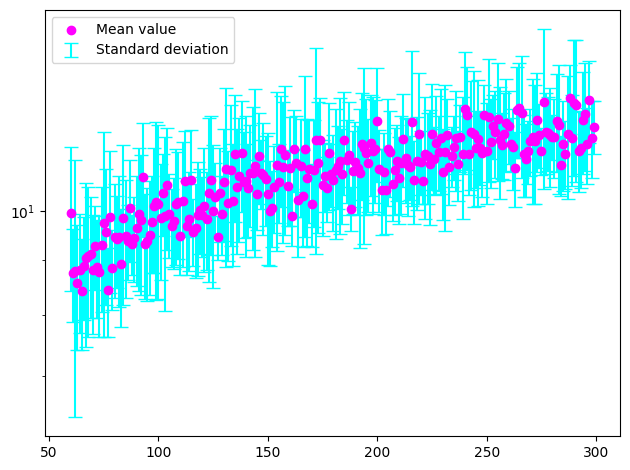

In [ ]:
times = []
x_mean = []
times_mean = []
times_std = []
n = 20
for m in tqdm(range(60, 300), desc="Kappa"):
    for _ in range(10):
        matrix = utils.generate_sparse_matrix(n=n, m=m)
        kappa = matrix.sum()/np.min(matrix.data)
        times.append(np.log(kappa))
    x_mean.append(m)
    times_mean.append(np.mean(times[-10:]))
    times_std.append(np.std(times[-10:]))

plt.errorbar(x_mean, times_mean, yerr=times_std, fmt="none", capsize=5., label="Standard deviation", color="cyan", zorder=1)
plt.scatter(x_mean, times_mean, label="Mean value", color="magenta")
plt.yscale("log")
plt.legend()
plt.tight_layout()
plt.savefig(f"kappa.pdf")
plt.show()

d: 100%|██████████| 240/240 [00:11<00:00, 20.05it/s]


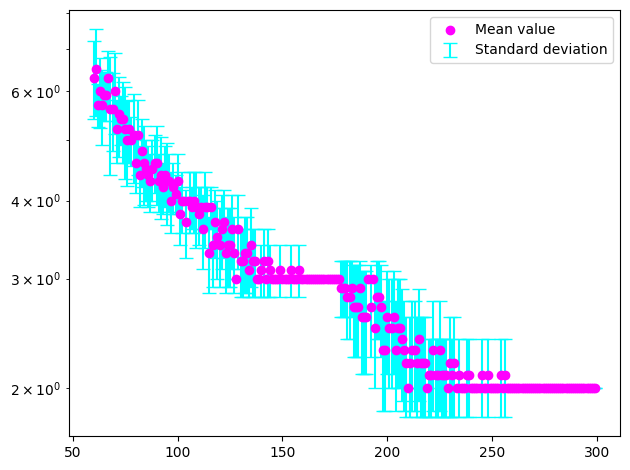

In [ ]:
times = []
x_mean = []
times_mean = []
times_std = []
n = 20
for m in tqdm(range(60, 300), desc="d"):
    for _ in range(10):
        matrix = utils.generate_sparse_matrix(n=n, m=m)
        d = utils.diameter_of_matrix(matrix)
        times.append(d)
    x_mean.append(m)
    times_mean.append(np.mean(times[-10:]))
    times_std.append(np.std(times[-10:]))

plt.errorbar(x_mean, times_mean, yerr=times_std, fmt="none", capsize=5., label="Standard deviation", color="cyan", zorder=1)
plt.scatter(x_mean, times_mean, label="Mean value", color="magenta")
plt.yscale("log")
plt.legend()
plt.tight_layout()
plt.savefig(f"d.pdf")
plt.show()

greedy: 100%|██████████| 100/100 [01:30<00:00,  1.11it/s]


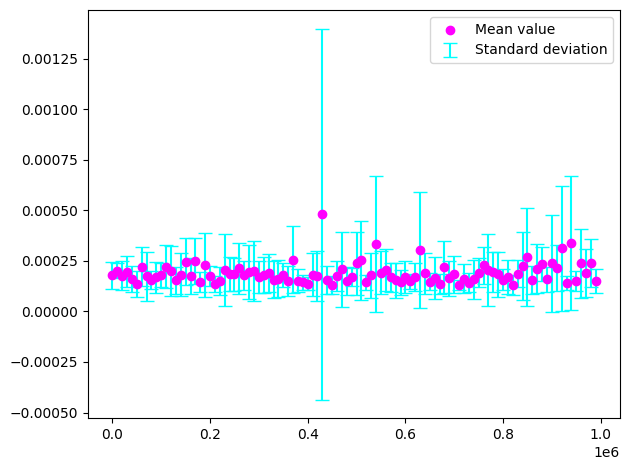

cyclic: 100%|██████████| 100/100 [02:17<00:00,  1.38s/it]


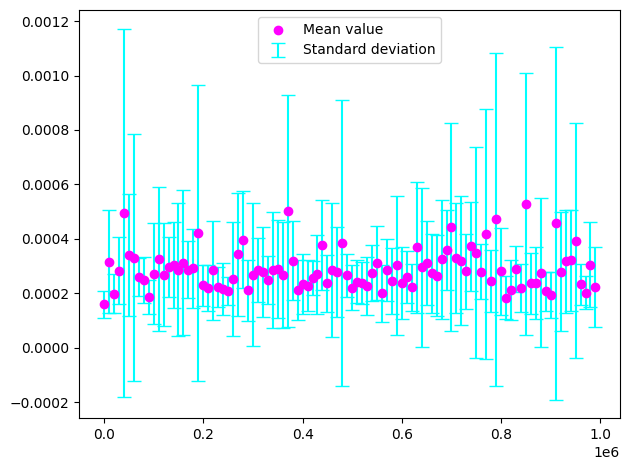

random: 100%|██████████| 100/100 [03:40<00:00,  2.21s/it]


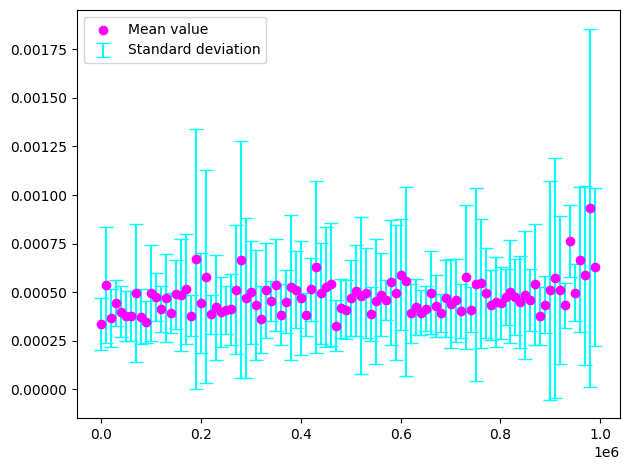

random_cyclic: 100%|██████████| 100/100 [02:34<00:00,  1.55s/it]


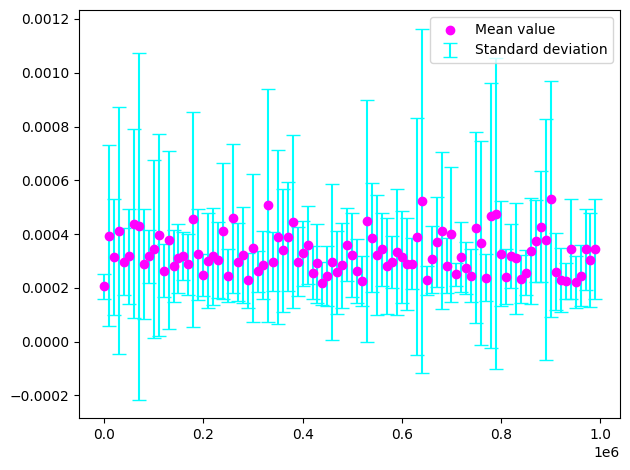

In [ ]:
epsilon=1e-2

for method in ['greedy', 'cyclic', 'random', 'random_cyclic']:
    x = []
    times = []
    x_mean = []
    times_mean = []
    times_std = []
    #kappa = 300
    n = 10
    m = 30
    for kappa in tqdm(np.arange(40, 1000000, 10000), desc=method):
        for _ in range(10):
            matrix = utils.generate_matrix_params(n=n, m=m, kappa=kappa)
            d = utils.diameter_of_matrix(matrix)

            balancer = osborn.MatrixBalancer(matrix, device='cpu', epsilon=epsilon)
            start_time = time.time()
            balanced_matrix, it = balancer.balance(method=method)
            times.append((time.time() - start_time) / (min(d, 1/epsilon)/epsilon))
            x.append(kappa)
        x_mean.append(kappa)
        times_mean.append(np.mean(times[-10:]))
        times_std.append(np.std(times[-10:]))
        #print(times_mean[-1])

    plt.errorbar(x_mean, times_mean, yerr=times_std, fmt="none", capsize=5., label="Standard deviation", color="cyan", zorder=1)
    plt.scatter(x_mean, times_mean, label="Mean value", color="magenta")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{method}_function_of_kappa.pdf")
    plt.show()

[360, 140, 80, 40, 20, 20, 20, 40, 20, 20]


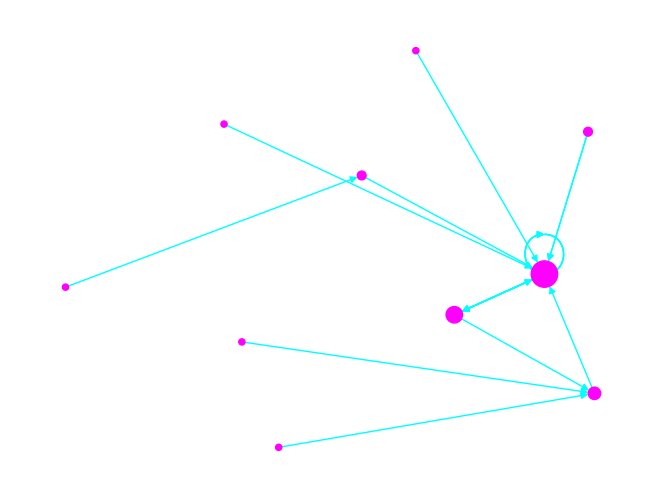

In [ ]:
G = nx.scale_free_graph(10)
#while not nx.is_strongly_connected(G):#
    #G = nx.scale_free_graph(10)

# Set node color to magenta and edge color to cyan
node_color = 'magenta'
edge_color = 'cyan'

# Scale the node sizes based on their degree
node_size = [v * 20 for v in dict(G.degree()).values()]
print(node_size)

# Plot the graph
nx.draw(G, with_labels=False, font_weight='bold', node_size=node_size, node_color=node_color, edge_color=edge_color)

# Show the plot
plt.show()


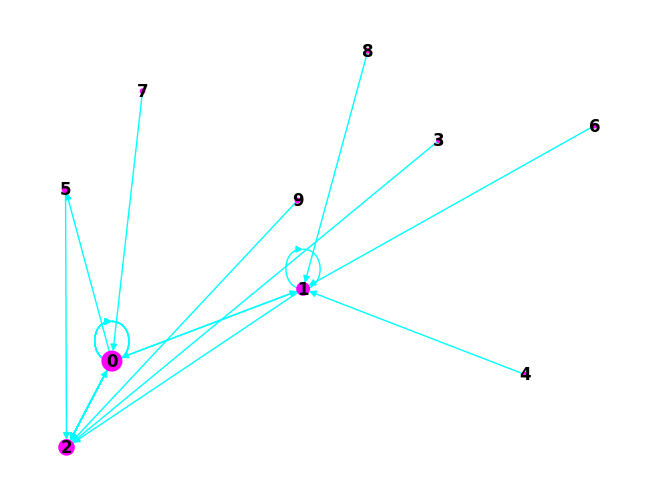

In [ ]:

# Generate a scale-free graph with 100 nodes
G = nx.scale_free_graph(10)

# Get the degrees of each node
degrees = dict(G.degree())

# Set node color to magenta and edge color to cyan
node_color = 'magenta'
edge_color = 'cyan'

# Scale the node sizes based on their degree
node_size = [v * 10 for v in degrees.values()]

# Plot the graph
nx.draw(G, with_labels=True, font_weight='bold', node_size=node_size, node_color=node_color, edge_color=edge_color)

# Show the plot
plt.show()
